# Customer Classification Model

# Loading Dataset

In [1]:
import pandas as pd
data = pd.read_csv('/Users/jugalshah/Desktop/Final_Classification_Clustering_model_sem_8/Clustered_Marketing_Campaign.csv')

# Train & Test Split

In [2]:
from sklearn.model_selection import train_test_split
X = data[["Is_Parent","Income","Teenhome","Kidhome","Age","Family_Member_Count","Spent"]]
y = data["Clusters"]
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [50]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False,n_estimators=100, learning_rate=0.1,eval_metric='mlogloss',random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.963882618510158


# Model Evaluation

F1 Score: 0.9640663259271562


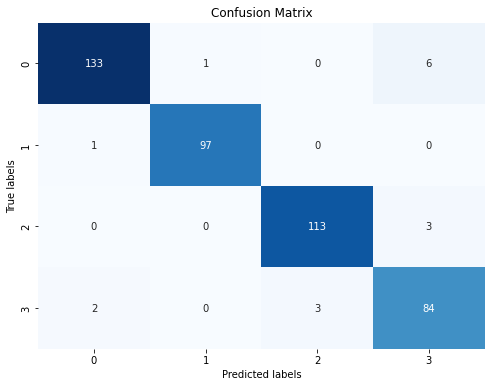

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Checking for Overfitting

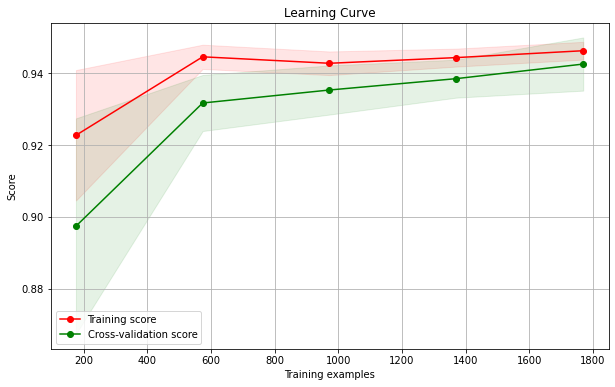

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from xgboost import XGBClassifier

# Define plot_learning_curve function
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define your X and y data
X = data[["Is_Parent", "Income", "Teenhome", "Age", "Family_Member_Count", "Kidhome",'Spent']]
y = data["Clusters"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier with learning_rate hyperparameter
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(
    use_label_encoder=False,
    learning_rate=0.01,
    subsample=0.1,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=100,
    max_depth=4,
    reg_lambda=1.5,
    reg_alpha=0,
    colsample_bytree=0.8,
    gamma=0.2,
   # early_stopping_rounds=10
)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Plot learning curve
plot_learning_curve(xgb_classifier, X, y, cv=5)
plt.show()


From the above given learning curve we can clearly confirm that the model generalizes well.

# Creating Pickle File

In [11]:
filename = 'finalized_xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))